In [1]:
# Import library
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00232/RCdata.zip

--2023-09-30 07:30:49--  https://archive.ics.uci.edu/ml/machine-learning-databases/00232/RCdata.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘RCdata.zip’

RCdata.zip              [ <=>                ]  38.74K  --.-KB/s    in 0.03s   

2023-09-30 07:30:49 (1.41 MB/s) - ‘RCdata.zip’ saved [39674]



In [3]:
!unzip /content/RCdata.zip

Archive:  /content/RCdata.zip
  inflating: chefmozaccepts.csv      
  inflating: chefmozcuisine.csv      
  inflating: chefmozhours4.csv       
  inflating: chefmozparking.csv      
  inflating: geoplaces2.csv          
  inflating: rating_final.csv        
  inflating: README                  
  inflating: usercuisine.csv         
  inflating: userpayment.csv         
  inflating: userprofile.csv         


In [4]:
accepts = pd.read_csv('/content/chefmozaccepts.csv')
cuisine = pd.read_csv('/content/chefmozcuisine.csv')
hours = pd.read_csv('/content/chefmozhours4.csv')
parking = pd.read_csv('/content/chefmozparking.csv')
geo = pd.read_csv('/content/geoplaces2.csv', encoding = "ISO-8859-1")
usercuisine = pd.read_csv('/content/usercuisine.csv')
payment = pd.read_csv('/content/userpayment.csv')
profile = pd.read_csv('/content/userprofile.csv')
rating = pd.read_csv('/content/rating_final.csv')

print('Jumlah data pembayaran yang diterima restoran: ', len(accepts.placeID.unique()))
print('Jumlah data masakan pada restoran: ', len(cuisine.placeID.unique()))
print('Jumlah data waktu buka restoran: ', len(hours.placeID.unique()))
print('Jumlah data lokasi restoran: ', len(geo.placeID.unique()))
print('Jumlah data masakan pengguna: ', len(usercuisine.userID.unique()))
print('Jumlah data profil pengguna: ', len(profile.userID.unique()))
print('Jumlah data penilaian yang diberikan pengguna: ', len(rating.userID.unique()))
print('Jumlah data penilaian restoran: ', len(rating.placeID.unique()))

Jumlah data pembayaran yang diterima restoran:  615
Jumlah data masakan pada restoran:  769
Jumlah data waktu buka restoran:  694
Jumlah data lokasi restoran:  130
Jumlah data masakan pengguna:  138
Jumlah data profil pengguna:  138
Jumlah data penilaian yang diberikan pengguna:  138
Jumlah data penilaian restoran:  130


In [5]:
# Membaca dataset
df = rating
df

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
...,...,...,...,...,...
1156,U1043,132630,1,1,1
1157,U1011,132715,1,1,0
1158,U1068,132733,1,1,0
1159,U1068,132594,1,1,1


In [6]:
import numpy as np

# Menggabungkan seluruh placeID pada kategori Restaurant
resto_all = np.concatenate((
    accepts.placeID.unique(),
    cuisine.placeID.unique(),
    hours.placeID.unique(),
    parking.placeID.unique(),
    geo.placeID.unique()
))

# Mengurutkan data dan menghapus data yang sama
resto_all = np.sort(np.unique(resto_all))

print('Jumlah seluruh data restoran berdasarkan placeID: ', len(resto_all))

Jumlah seluruh data restoran berdasarkan placeID:  938


In [7]:
# Menggabungkan seluruh userID
user_all = np.concatenate((
    usercuisine.userID.unique(),
    payment.userID.unique(),
    profile.userID.unique()
))

# Menghapus data yang sama kemudian mengurutkannya
user_all = np.sort(np.unique(user_all))

print('Jumlah seluruh user: ', len(user_all))

Jumlah seluruh user:  138


In [8]:
# Menggabungkan file accepts, geo, parking, hours ke dalam dataframe resto_info
resto_info = pd.concat([accepts, geo, parking, hours])

# Menggabungkan dataframe rating dengan resto_info berdasarkan nilai placeID
resto = pd.merge(rating, resto_info , on='placeID', how='left')
resto

,userID,placeID,rating,food_rating,service_rating,Rpayment,latitude,longitude,the_geom_meter,name,...,accessibility,price,url,Rambience,franchise,area,other_services,parking_lot,hours,days
0,U1077,135085,2,2,2,cash,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,U1077,135085,2,2,2,NaN,22.150802,-100.982680,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,...,no_accessibility,medium,?,familiar,f,closed,none,NaN,NaN,NaN
2,U1077,135085,2,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,public,NaN,NaN
3,U1077,135085,2,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00-00:00;,Mon;Tue;Wed;Thu;Fri;
4,U1077,135085,2,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00-00:00;,Sat;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8073,U1068,132660,0,0,0,NaN,23.752943,-99.164679,0101000020957F00003D7905C9DC8157C13FCD1AB7334E...,carnitas mata calle Emilio Portes Gil,...,completely,low,?,familiar,f,closed,none,NaN,NaN,NaN
8074,U1068,132660,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN
8075,U1068,132660,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00-23:30;,Mon;Tue;Wed;Thu;Fri;
8076,U1068,132660,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00-23:30;,Sat;


In [9]:
# Cek missing value dengan fungsi isnull()
resto.isnull().sum()

userID               0
placeID              0
rating               0
food_rating          0
service_rating       0
Rpayment          5781
latitude          6917
longitude         6917
the_geom_meter    6917
name              6917
address           6917
city              6917
state             6917
country           6917
fax               6917
zip               6917
alcohol           6917
smoking_area      6917
dress_code        6917
accessibility     6917
price             6917
url               6917
Rambience         6917
franchise         6917
area              6917
other_services    6917
parking_lot       6917
hours             4619
days              4619
dtype: int64

In [10]:
# Menghitung jumlah rating, food_rating, dan service kemudian menggabungkannya berdasarkan placeID
resto.groupby('placeID').sum()

<ipython-input-10-d59bd19b2b68>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resto.groupby('placeID').sum()


,rating,food_rating,service_rating,latitude,longitude
placeID,,,,,
132560,12,24,6,95.009216,-396.667653
132561,15,20,20,94.907276,-396.506024
132564,25,25,30,94.923698,-396.580739
132572,90,90,84,332.124707,-1514.890677
132583,24,24,30,75.689162,-396.937328
...,...,...,...,...,...
135088,36,42,36,113.256068,-595.319338
135104,48,80,48,166.270875,-694.179039
135106,96,96,96,221.497088,-1009.760928


In [11]:
# Definisikan dataframe rating ke dalam variabel all_resto_rate
all_resto_rate = rating
all_resto_rate

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2
...,...,...,...,...,...
1156,U1043,132630,1,1,1
1157,U1011,132715,1,1,0
1158,U1068,132733,1,1,0
1159,U1068,132594,1,1,1


In [12]:
# Menggabungkan all resto_rate dengan dataframe geo berdasarkan placeID
all_resto_name = pd.merge(all_resto_rate, geo[['placeID','name']], on='placeID', how='left')

# Print dataframe all_resto_name
all_resto_name

,userID,placeID,rating,food_rating,service_rating,name
0,U1077,135085,2,2,2,Tortas Locas Hipocampo
1,U1077,135038,2,2,1,Restaurant la Chalita
2,U1077,132825,2,2,2,puesto de tacos
3,U1077,135060,1,2,2,Restaurante Marisco Sam
4,U1068,135104,1,1,2,vips
...,...,...,...,...,...,...
1156,U1043,132630,1,1,1,palomo tec
1157,U1011,132715,1,1,0,tacos de la estacion
1158,U1068,132733,1,1,0,Little Cesarz
1159,U1068,132594,1,1,1,tacos de barbacoa enfrente del Tec


In [13]:
# Menggabungkan dataframe cuisine dengan all_resto_name dan memasukkannya ke dalam variabel all_resto
all_resto = pd.merge(all_resto_name, cuisine, on='placeID', how='left')
all_resto

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
0,U1077,135085,2,2,2,Tortas Locas Hipocampo,Fast_Food
1,U1077,135038,2,2,1,Restaurant la Chalita,NaN
2,U1077,132825,2,2,2,puesto de tacos,Mexican
3,U1077,135060,1,2,2,Restaurante Marisco Sam,Seafood
4,U1068,135104,1,1,2,vips,Mexican
...,...,...,...,...,...,...,...
1326,U1043,132630,1,1,1,palomo tec,Mexican
1327,U1011,132715,1,1,0,tacos de la estacion,Mexican
1328,U1068,132733,1,1,0,Little Cesarz,Pizzeria
1329,U1068,132594,1,1,1,tacos de barbacoa enfrente del Tec,Mexican


In [14]:
# Mengecek missing value pada dataframe all_resto
all_resto.isnull().sum()

userID              0
placeID             0
rating              0
food_rating         0
service_rating      0
name                0
Rcuisine          288
dtype: int64

In [15]:
# Membersihkan missing value dengan fungsi dropna()
all_resto_clean = all_resto.dropna()
all_resto_clean

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
0,U1077,135085,2,2,2,Tortas Locas Hipocampo,Fast_Food
2,U1077,132825,2,2,2,puesto de tacos,Mexican
3,U1077,135060,1,2,2,Restaurante Marisco Sam,Seafood
4,U1068,135104,1,1,2,vips,Mexican
5,U1068,132740,0,0,0,Carreton de Flautas y Migadas,Mexican
...,...,...,...,...,...,...,...
1325,U1043,132732,1,1,1,Taqueria EL amigo,Mexican
1326,U1043,132630,1,1,1,palomo tec,Mexican
1327,U1011,132715,1,1,0,tacos de la estacion,Mexican
1328,U1068,132733,1,1,0,Little Cesarz,Pizzeria


In [16]:
# Mengecek kembali missing value pada variabel all_resto_clean
all_resto_clean.isnull().sum()

userID            0
placeID           0
rating            0
food_rating       0
service_rating    0
name              0
Rcuisine          0
dtype: int64

In [17]:
# Mengurutkan resto berdasarkan PlaceID kemudian memasukkannya ke dalam variabel fix_resto
fix_resto = all_resto_clean.sort_values('placeID', ascending=True)
fix_resto

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
1303,U1087,132560,1,2,1,puesto de gorditas,Regional
1288,U1050,132560,0,2,0,puesto de gorditas,Regional
14,U1067,132560,1,0,0,puesto de gorditas,Regional
42,U1082,132560,0,0,0,puesto de gorditas,Regional
1052,U1013,132572,1,1,0,Cafe Chaires,Cafeteria
...,...,...,...,...,...,...,...
438,U1024,135106,1,1,1,El Rincón de San Francisco,Mexican
178,U1020,135109,2,2,1,Paniroles,Italian
1071,U1041,135109,1,2,1,Paniroles,Italian
99,U1030,135109,0,0,0,Paniroles,Italian


In [18]:
# Mengecek berapa jumlah fix_resto
len(fix_resto.placeID.unique())

95

In [19]:
# Mengecek kategori masakan yang unik
fix_resto.Rcuisine.unique()

array(['Regional', 'Cafeteria', 'American', 'Mexican', 'Fast_Food',
       'Italian', 'Armenian', 'Pizzeria', 'Japanese', 'Vietnamese',
       'Family', 'International', 'Game', 'Burgers', 'Bakery', 'Bar',
       'Breakfast-Brunch', 'Bar_Pub_Brewery', 'Mediterranean',
       'Cafe-Coffee_Shop', 'Contemporary', 'Seafood', 'Chinese'],
      dtype=object)

In [20]:
# Mengecek kategori masakan Game
fix_resto[fix_resto['Rcuisine'] == 'Game']

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
781,U1015,132851,1,1,1,KFC,Game
509,U1052,132851,1,0,2,KFC,Game
708,U1008,132851,1,1,1,KFC,Game
770,U1037,132851,2,2,1,KFC,Game
574,U1069,132851,1,0,0,KFC,Game
1188,U1131,132851,2,2,2,KFC,Game
764,U1111,132851,2,1,0,KFC,Game


In [21]:
# Mengecek kategori masakan pada nama restoran KFC
fix_resto[fix_resto['name'] == 'KFC']

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
781,U1015,132851,1,1,1,KFC,Game
508,U1052,132851,1,0,2,KFC,American
780,U1015,132851,1,1,1,KFC,American
509,U1052,132851,1,0,2,KFC,Game
708,U1008,132851,1,1,1,KFC,Game
707,U1008,132851,1,1,1,KFC,American
770,U1037,132851,2,2,1,KFC,Game
769,U1037,132851,2,2,1,KFC,American
1187,U1131,132851,2,2,2,KFC,American
574,U1069,132851,1,0,0,KFC,Game


In [22]:
# Mengubah nama kategori masakan ‘Game’ menjadi ‘American’
fix_resto = fix_resto.replace('Game', 'American')
fix_resto[fix_resto['name'] == 'KFC']

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
781,U1015,132851,1,1,1,KFC,American
508,U1052,132851,1,0,2,KFC,American
780,U1015,132851,1,1,1,KFC,American
509,U1052,132851,1,0,2,KFC,American
708,U1008,132851,1,1,1,KFC,American
707,U1008,132851,1,1,1,KFC,American
770,U1037,132851,2,2,1,KFC,American
769,U1037,132851,2,2,1,KFC,American
1187,U1131,132851,2,2,2,KFC,American
574,U1069,132851,1,0,0,KFC,American


In [23]:
# Membuat variabel preparation yang berisi dataframe fix_resto kemudian mengurutkan berdasarkan placeID
preparation = fix_resto
preparation.sort_values('placeID')

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
1303,U1087,132560,1,2,1,puesto de gorditas,Regional
1288,U1050,132560,0,2,0,puesto de gorditas,Regional
14,U1067,132560,1,0,0,puesto de gorditas,Regional
42,U1082,132560,0,0,0,puesto de gorditas,Regional
184,U1055,132572,2,2,2,Cafe Chaires,Cafeteria
...,...,...,...,...,...,...,...
1224,U1002,135106,1,1,1,El Rincón de San Francisco,Mexican
99,U1030,135109,0,0,0,Paniroles,Italian
178,U1020,135109,2,2,1,Paniroles,Italian
1071,U1041,135109,1,2,1,Paniroles,Italian


In [24]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('placeID')
preparation

,userID,placeID,rating,food_rating,service_rating,name,Rcuisine
1303,U1087,132560,1,2,1,puesto de gorditas,Regional
1052,U1013,132572,1,1,0,Cafe Chaires,Cafeteria
168,U1118,132583,0,0,0,McDonalds Centro,American
24,U1107,132584,2,2,2,Gorditas Dona Tota,Mexican
1329,U1068,132594,1,1,1,tacos de barbacoa enfrente del Tec,Mexican
...,...,...,...,...,...,...,...
681,U1095,135086,1,2,1,Mcdonalds Parque Tangamanga,Fast_Food
175,U1020,135088,1,2,0,Cafeteria cenidet,Cafeteria
4,U1068,135104,1,1,2,vips,Mexican
488,U1004,135106,2,2,2,El Rincón de San Francisco,Mexican


In [25]:
# Mengonversi data series 'placeID' menjadi dalam bentuk list
resto_id = preparation['placeID'].tolist()

# Mengonversi data series 'Name' menjadi dalam bentuk list
resto_name = preparation['name'].tolist()

# Mengonversi data series 'Rcuisine' menjadi dalam bentuk list
resto_cuisine = preparation['Rcuisine'].tolist()

print(len(resto_id))
print(len(resto_name))
print(len(resto_cuisine))

95
95
95


In [26]:
# Membuat dictionary untuk data 'resto_id', 'resto_name', dan 'cuisine'
resto_new = pd.DataFrame({
    'id': resto_id,
    'resto_name': resto_name,
    'cuisine': resto_cuisine
})
resto_new

,id,resto_name,cuisine
0,132560,puesto de gorditas,Regional
1,132572,Cafe Chaires,Cafeteria
2,132583,McDonalds Centro,American
3,132584,Gorditas Dona Tota,Mexican
4,132594,tacos de barbacoa enfrente del Tec,Mexican
...,...,...,...
90,135086,Mcdonalds Parque Tangamanga,Fast_Food
91,135088,Cafeteria cenidet,Cafeteria
92,135104,vips,Mexican
93,135106,El Rincón de San Francisco,Mexican


In [27]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['userID'].unique().tolist()
print('list userID: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID: ', user_to_user_encoded)

# Melakukan proses encoding angka ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  ['U1077', 'U1068', 'U1067', 'U1103', 'U1107', 'U1044', 'U1070', 'U1031', 'U1082', 'U1023', 'U1060', 'U1015', 'U1123', 'U1021', 'U1026', 'U1083', 'U1108', 'U1012', 'U1093', 'U1030', 'U1066', 'U1127', 'U1017', 'U1100', 'U1133', 'U1118', 'U1072', 'U1080', 'U1063', 'U1074', 'U1117', 'U1020', 'U1051', 'U1055', 'U1053', 'U1035', 'U1064', 'U1081', 'U1001', 'U1014', 'U1088', 'U1056', 'U1134', 'U1106', 'U1126', 'U1124', 'U1018', 'U1125', 'U1119', 'U1076', 'U1022', 'U1094', 'U1116', 'U1105', 'U1075', 'U1007', 'U1115', 'U1024', 'U1132', 'U1005', 'U1120', 'U1004', 'U1037', 'U1052', 'U1036', 'U1038', 'U1071', 'U1114', 'U1084', 'U1049', 'U1019', 'U1069', 'U1113', 'U1104', 'U1079', 'U1045', 'U1009', 'U1016', 'U1047', 'U1095', 'U1034', 'U1078', 'U1099', 'U1008', 'U1040', 'U1121', 'U1110', 'U1042', 'U1013', 'U1054', 'U1111', 'U1128', 'U1062', 'U1101', 'U1135', 'U1032', 'U1048', 'U1092', 'U1085', 'U1109', 'U1102', 'U1098', 'U1046', 'U1122', 'U1138', 'U1033', 'U1089', 'U1003', 'U1091', 'U10

In [28]:
# Mengubah placeID menjadi list tanpa nilai yang sama
resto_ids = df['placeID'].unique().tolist()

# Melakukan proses encoding placeID
resto_to_resto_encoded = {x: i for i, x in enumerate(resto_ids)}

# Melakukan proses encoding angka ke placeID
resto_encoded_to_resto = {i: x for i, x in enumerate(resto_ids)}

# Petakan userID dan placeID ke dataframe yang berkaitan.

# Mapping userID ke dataframe user
df['user'] = df['userID'].map(user_to_user_encoded)

# Mapping placeID ke dataframe resto
df['resto'] = df['placeID'].map(resto_to_resto_encoded)

In [29]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah resto
num_resto = len(resto_encoded_to_resto)
print(num_resto)

# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['rating'])

# Nilai maksimal rating
max_rating = max(df['rating'])

print('Number of User: {}, Number of Resto: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_resto, min_rating, max_rating
))

138
130
Number of User: 138, Number of Resto: 130, Min Rating: 0.0, Max Rating: 2.0


In [30]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,userID,placeID,rating,food_rating,service_rating,user,resto
538,U1052,132870,1.0,1,1,63,116
673,U1015,132869,2.0,2,2,11,115
578,U1047,132875,0.0,0,0,78,117
242,U1056,135076,2.0,2,2,41,71
1063,U1002,135106,1.0,1,1,125,64
...,...,...,...,...,...,...,...
1044,U1073,135065,0.0,0,0,123,94
1095,U1058,135062,2.0,2,2,124,76
1130,U1087,132660,1.0,1,0,132,14
860,U1029,132937,1.0,1,1,110,126


In [31]:
# Membuat variabel x untuk mencocokkan data user dan resto menjadi satu value
x = df[['user', 'resto']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 63 116]
 [ 11 115]
 [ 78 117]
 ...
 [132  14]
 [110 126]
 [129   6]] [0.5 1.  0.  ... 0.5 0.5 0. ]


In [32]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_resto, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_resto = num_resto
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # Layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # Layer embedding user bias
    self.resto_embedding = layers.Embedding( # Layer embeddings resto
        num_resto,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_resto, 1) # Layer embedding resto bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # Memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # Memanggil layer embedding 2
    resto_vector = self.resto_embedding(inputs[:, 1]) # Memanggil layer embedding 3
    resto_bias = self.resto_bias(inputs[:, 1]) # Memanggil layer embedding 4

    dot_user_resto = tf.tensordot(user_vector, resto_vector, 2)

    x = dot_user_resto + user_bias + resto_bias

    return tf.nn.sigmoid(x) # Activation sigmoid

In [33]:
model = RecommenderNet(num_users, num_resto, 50) # Inisialisasi model

# Model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [34]:
# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
116/116 [==============================] - 2s 5ms/step - loss: 0.6955 - root_mean_squared_error: 0.4000 - val_loss: 0.7050 - val_root_mean_squared_error: 0.4082
Epoch 2/100
116/116 [==============================] - 0s 2ms/step - loss: 0.6756 - root_mean_squared_error: 0.3875 - val_loss: 0.7020 - val_root_mean_squared_error: 0.4063
Epoch 3/100
116/116 [==============================] - 0s 2ms/step - loss: 0.6599 - root_mean_squared_error: 0.3775 - val_loss: 0.6981 - val_root_mean_squared_error: 0.4040
Epoch 4/100
116/116 [==============================] - 0s 2ms/step - loss: 0.6557 - root_mean_squared_error: 0.3750 - val_loss: 0.6960 - val_root_mean_squared_error: 0.4027
Epoch 5/100
116/116 [==============================] - 0s 2ms/step - loss: 0.6439 - root_mean_squared_error: 0.3674 - val_loss: 0.6923 - val_root_mean_squared_error: 0.4004
Epoch 6/100
116/116 [==============================] - 0s 3ms/step - loss: 0.6332 - root_mean_squared_error: 0.3606 - val_loss: 0.6891 

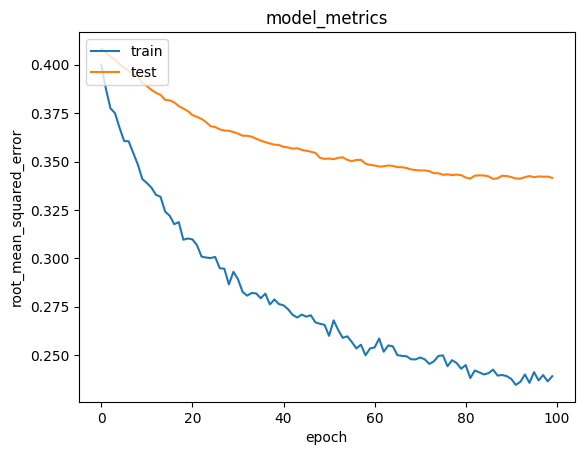

In [35]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
resto_df = resto_new
df = pd.read_csv('rating_final.csv')

# Mengambil sample user
user_id = df.userID.sample(1).iloc[0]
resto_visited_by_user = df[df.userID == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
resto_not_visited = resto_df[~resto_df['id'].isin(resto_visited_by_user.placeID.values)]['id']
resto_not_visited = list(
    set(resto_not_visited)
    .intersection(set(resto_to_resto_encoded.keys()))
)

resto_not_visited = [[resto_to_resto_encoded.get(x)] for x in resto_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_resto_array = np.hstack(
    ([[user_encoder]] * len(resto_not_visited), resto_not_visited)
)

In [37]:
ratings = model.predict(user_resto_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_resto_ids = [
    resto_encoded_to_resto.get(resto_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Resto with high ratings from user')
print('----' * 8)

top_resto_user = (
    resto_visited_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .placeID.values
)

resto_df_rows = resto_df[resto_df['id'].isin(top_resto_user)]
for row in resto_df_rows.itertuples():
    print(row.resto_name, ':', row.cuisine)

print('----' * 8)
print('Top 10 resto recommendation')
print('----' * 8)

recommended_resto = resto_df[resto_df['id'].isin(recommended_resto_ids)]
for row in recommended_resto.itertuples():
    print(row.resto_name, ':', row.cuisine)

3/3 [==============================] - 0s 3ms/step
Showing recommendations for users: U1128
Resto with high ratings from user
--------------------------------
Pizzeria Julios : American
shi ro ie : Japanese
La Fontana Pizza Restaurante and Cafe : Pizzeria
Restaurante Tiberius : Pizzeria
Koye Sushi : Chinese
--------------------------------
Top 10 resto recommendation
--------------------------------
La Estrella de Dimas : Mexican
Mariscos Tia Licha : Family
El cotorreo : Mexican
KFC : American
La Posada del Virrey : International
cafe punta del cielo : Cafeteria
emilianos : Bar_Pub_Brewery
Restaurant Las Mananitas : International
El Oceano Dorado : Mexican
Michiko Restaurant Japones : Japanese
